# Loan Application Status Prediction

### Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

## Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 


Downlaod Files:

https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


### To set a raw data from github

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
#importing data
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


* There are 614 rows and 13 columns in data set
* There are 3 different datatypes in the dataset which include float64(4), int64(1), object(8)


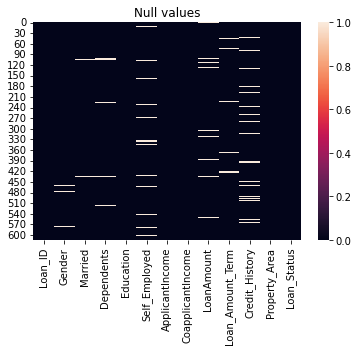

In [6]:
# cheaking the null values
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#filling the null value
df = df.fillna(df.mean().iloc[0])

/var/folders/bj/9_ddg14x7110bx146clhm6xw0000gn/T/ipykernel_2203/1917865022.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean().iloc[0])


In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### using the fillna function to fill the missing values


In [10]:
# statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,334.775414,457.407866,440.794730
std,6109.041673,2926.248369,981.515962,758.873005,1478.816648
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,175.000000,360.000000,1.000000
max,81000.000000,41667.000000,5403.459283,5403.459283,5403.459283


In [11]:
# label incoding
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,5403.459283,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [13]:
#Dependents
df['Dependents'].value_counts()

0                    345
1                    102
2                    101
3+                    51
5403.459283387622     15
Name: Dependents, dtype: int64

In [14]:
#replacing the value of 3+ to 4
df = df.replace(to_replace='3+', value= 4)

In [15]:
#Dependents
df['Dependents'].value_counts()

0                    345
1                    102
2                    101
4                     51
5403.459283387622     15
Name: Dependents, dtype: int64

In [16]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Data visualization

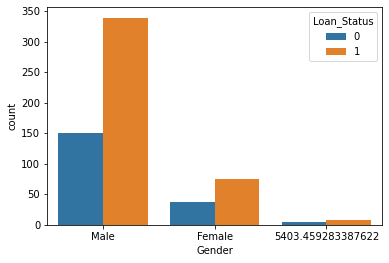

In [17]:
# Gender and loan_status
sns.countplot(x = 'Gender', hue='Loan_Status', data=df)
plt.show()

* Orange bar is approved loan
* Blue bar is not-approved loan
* As you can see male applicants have higher percentage of loan approved than female 
* As compared to female male apply more for loan

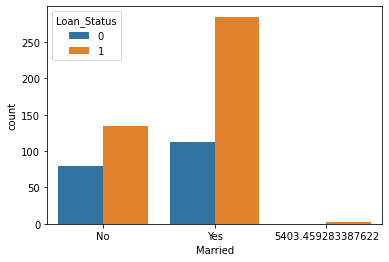

In [18]:
# Married and loan_status
sns.countplot(x = 'Married', hue='Loan_Status', data=df)
plt.show()

* Married people apply more for loan and married people approved more than single people


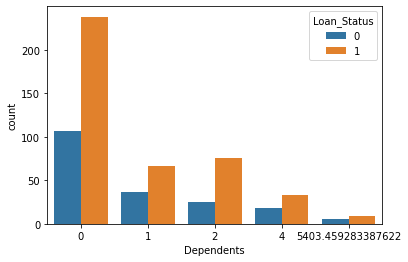

In [19]:
# Dependents and loan_status
sns.countplot(x = 'Dependents', hue='Loan_Status', data=df)
plt.show()

* More non Dependents people apply for loan
* There is high chance of getting loan who don't have any dependents member in family

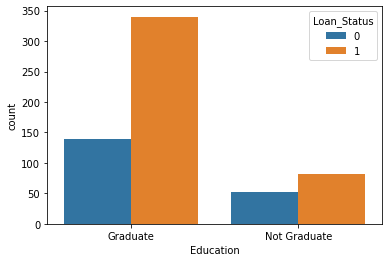

In [20]:
# Education and loan_status
sns.countplot(x = 'Education', hue='Loan_Status', data=df)
plt.show()

* Educated people approved more than non educated one 


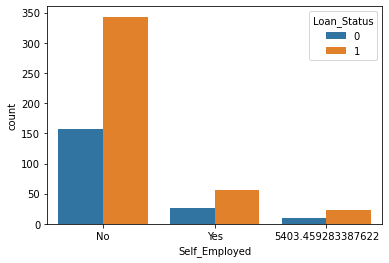

In [21]:
# Self_Employed and loan_status
sns.countplot(x = 'Self_Employed', hue='Loan_Status', data=df)
plt.show()

* Job people apply more for loan and get approved too
* Self_Employed people not get approved that essly

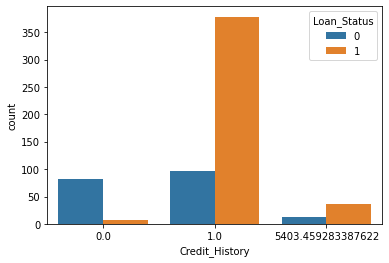

In [22]:
# Credit_History and loan_status
sns.countplot(x = 'Credit_History', hue='Loan_Status', data=df)
plt.show()

* 0 means bad Credit History
* 1 means good Credit History
* The people have good credit history get approved more than bad one

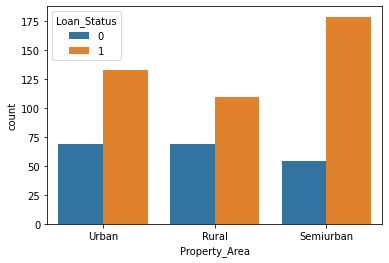

In [23]:
# Property_Area and loan_status
sns.countplot(x = 'Property_Area', hue='Loan_Status', data=df)
plt.show()

* Higher percentage of loan approval is for semi-urban area
* 2nd Urban area
* Then Rural area

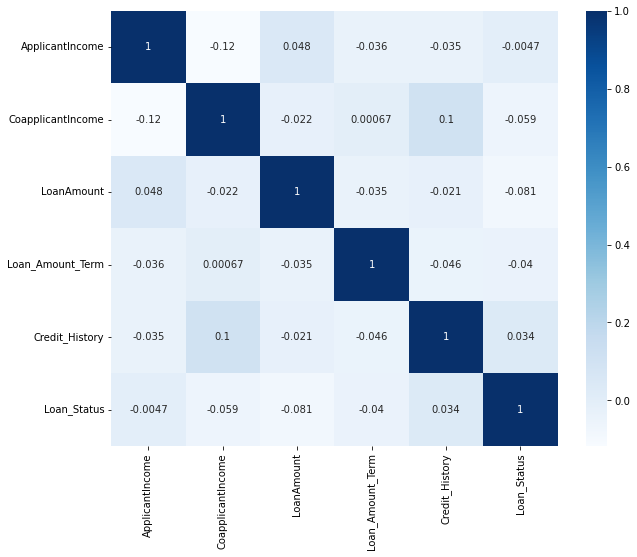

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues');

In [25]:
# print out column with unique values
for col in df.columns:
    if df[col].dtypes == 'object':
        num_of_unique_cat = len (df[col].unique())
        print("Features '{col_name}' has '{unique_cat}' unique categories". format(col_name=col, unique_cat=num_of_unique_cat))

Features 'Loan_ID' has '614' unique categories
Features 'Gender' has '3' unique categories
Features 'Married' has '3' unique categories
Features 'Dependents' has '5' unique categories
Features 'Education' has '2' unique categories
Features 'Self_Employed' has '3' unique categories
Features 'Property_Area' has '3' unique categories


##### convert categorical columns to numerical values


In [26]:
df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
df['Married'].replace({'Yes':1,'No':0},inplace=True)
df['Gender'].replace({'Male':1,'Female':0},inplace=True)
df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
df['Property_Area'].replace({'Urban':2,'Semiurban':1,'Rural':0},inplace=True)
df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,5403.459283,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1


In [28]:
# separating the data and label
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = df['Loan_Status']

In [29]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0          0          1            0.0             5849   
1       1.0      1.0          1          1            0.0             4583   
2       1.0      1.0          0          1            1.0             3000   
3       1.0      1.0          0          0            0.0             2583   
4       1.0      0.0          0          1            0.0             6000   
..      ...      ...        ...        ...            ...              ...   
609     0.0      0.0          0          1            0.0             2900   
610     1.0      1.0          4          1            0.0             4106   
611     1.0      1.0          1          1            0.0             8072   
612     1.0      1.0          2          1            0.0             7583   
613     0.0      0.0          0          1            1.0             4583   

     CoapplicantIncome   LoanAmount  Loan_Amount_Term  Credit_H

## Spliting the data

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=5)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (552, 11) (62, 11)


## Logistic Regression

Logistic regression is applied to predict the categorical dependent variable. In other words, it's used when the prediction is categorical, for example, yes or no, true or false, 0 or 1. The predicted probability or output of logistic regression can be either one of them, and there's no middle ground.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [33]:
model = LogisticRegression() #define the model

In [34]:
model.fit(X_train,Y_train)#fit the model


LogisticRegression()

In [35]:
model.score(X_train,Y_train)

0.6956521739130435

In [36]:
model.score(X_test,Y_test)

0.6451612903225806

In [37]:
y_pred = model.predict(X_test)#predict on test sample

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2_score(Y_test,y_pred)

-0.6695226438188493